In [341]:
# Import libraries
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import xpress as xp
import seaborn as sns
import matplotlib.dates as mdates
from sklearn.cluster import KMeans
import folium
import osmnx as ox
import geopandas as gpd

In [342]:
from pyproj import CRS, Geod, Proj, transform
v84 = Proj(proj="latlong",towgs84="0,0,0",ellps="WGS84")
v36 = Proj(proj="latlong", k=0.9996012717, ellps="airy",
        towgs84="446.448,-125.157,542.060,0.1502,0.2470,0.8421,-20.4894")
vgrid = Proj(init="world:bng")


def vectorized_convert(df,easting_file,northing_file):
    vlon36, vlat36 = vgrid(easting_file, 
                           northing_file, 
                           inverse=True)
    converted = transform(v36, v84, vlon36, vlat36)
    df['longitude'] = converted[0]
    df['latitude'] = converted[1]
    return df


# from: https://stackoverflow.com/questions/62019398/fast-conversion-of-easting-and-northing-to-latitude-and-longitude-for-a-large-da

c:\Anaconda\envs\xpress_2023\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Customer

In [343]:
customer = pd.read_csv('CustomerId.csv').merge(pd.read_csv('CustomerNorthing.csv'), how='inner').merge(pd.read_csv('CustomerEasting.csv'), how='inner')
# customer.head()

easting_file = customer['CustomerEasting'].values
northing_file = customer['CustomerNorthing'].values

customer = vectorized_convert(customer,easting_file,northing_file)
customer.head()

C:\Users\Nicolás Talia\AppData\Local\Temp\ipykernel_15580\1301223978.py:12: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  converted = transform(v36, v84, vlon36, vlat36)


,Customers,CustomerId,CustomerNorthing,CustomerEasting,longitude,latitude
0,1,AB10,805109,392949,-2.118129,57.136832
1,2,AB11,805438,394404,-2.094098,57.139808
2,3,AB12,800946,393407,-2.110451,57.099442
3,4,AB13,801808,385705,-2.237621,57.107009
4,5,AB14,801140,383616,-2.272063,57.100938


Candidates

In [344]:
candidates = pd.read_csv('CandidateId.csv').merge(pd.read_csv('CandidateEasting.csv'), how='inner').merge(pd.read_csv('CandidateNorthing.csv'), how='inner').merge(pd.read_csv('Capacity.csv'), how='inner').merge(pd.read_csv('Setup.csv'), how='inner').merge(pd.read_csv('Operating.csv'), how='inner')

easting_file = candidates['CandidateEasting'].values
northing_file = candidates['CandidateNorthing'].values

candidates = vectorized_convert(candidates,easting_file,northing_file)

candidates.head()

C:\Users\Nicolás Talia\AppData\Local\Temp\ipykernel_15580\1301223978.py:12: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  converted = transform(v36, v84, vlon36, vlat36)


,Candidates,CandidateId,CandidateEasting,CandidateNorthing,Capacity,Setup,Operating,longitude,latitude
0,1,AB10,392949,805109,4320000,5424000,542400,-2.118129,57.136832
1,2,AB11,394404,805438,4360000,5312000,531200,-2.094098,57.139808
2,3,AB12,393407,800946,4720000,4388000,438800,-2.110451,57.099442
3,4,AB13,385705,801808,4760000,4318000,431800,-2.237621,57.107009
4,5,AB14,383616,801140,5040000,3716000,371600,-2.272063,57.100938


Suppliers

In [345]:
suppliers = pd.read_csv('SupplierId.csv').merge(pd.read_csv('SupplierEasting.csv'), how='inner').merge(pd.read_csv('SupplierNorthing.csv'), how='inner').merge(pd.read_csv('SupplierCapacity.csv'), how='inner').merge(pd.read_csv('SupplierProductGroup.csv'), how='inner').merge(pd.read_csv('SupplierVehicleType.csv'), how='inner')

easting_file = suppliers['SupplierEasting'].values
northing_file = suppliers['SupplierNorthing'].values

suppliers = vectorized_convert(suppliers,easting_file,northing_file)

suppliers.head()

C:\Users\Nicolás Talia\AppData\Local\Temp\ipykernel_15580\1301223978.py:12: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  converted = transform(v36, v84, vlon36, vlat36)


,Suppliers,SupplierId,SupplierEasting,SupplierNorthing,SupplierCapacity,SupplierProductGroup,SupplierVehicleType,longitude,latitude
0,1,1,165124,823186,1708620,1,1,-5.894144,57.238907
1,2,2,218457,712442,1410738,1,1,-4.933282,56.269642
2,3,3,166352,777690,434234,1,2,-5.831583,56.831762
3,4,4,370643,797391,596810,1,2,-2.485744,57.066614
4,5,5,241260,687436,233900,1,2,-4.550559,56.053375


distance_district_district


In [346]:
# demand_coord = np.column_stack((np.array(customer_coordinates['CustomerEasting']),customer_coordinates['CustomerNorthing']
# kmeans = KMeans(n_clusters= 10, init = 'random', n_init = 1, max_iter=300, random_state = 2)
# kmeans = kmeans.fit(demand_coord)

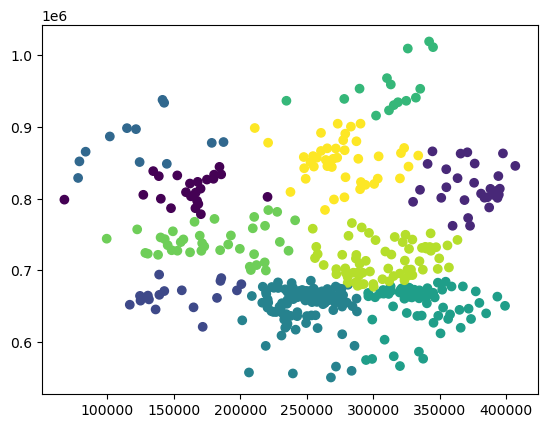

In [347]:
plt.scatter(demand_coord[:,0],demand_coord[:,1],c=kmeans.labels_)

### Variables definition
The variables are:

w -> candidate warehouse c -> customer t -> time period

$x_{w,c,t}$ : is a binary variable that is 1 if a customer is served by a candidate warehouse in period t


$y_{w,t}$ : is a binary variable that is 1 if a candidate warehouse operates in period t

$k_{w}$ : is a binary variable that is 1 if a candidate warehouse is set

$z_{w,s}$ : is a binary variable that is 1 if a warehouse recive products by supplier s

In [349]:
prob = xp.problem('tartan')

t = 10
x = {}
y = {}
z = {}
s = {}


for i in range(len(candidates)):
    for j in range(len(customer)):
        for k in range(t):
            namex = 'x_{0}_{1}_{2}'.format(candidates['CandidateId'][i],customer['CustomerId'][j],k)
            x[namex] = xp.var(vartype=xp.binary, name=namex)

for i in range(len(candidates)):
    for j in range(len(suppliers)):
        namez = 'z_{0}_{1}'.format(candidates['CandidateId'][i],suppliers['SupplierId'][j])
        z[namez] = xp.var(vartype=xp.binary, name=namez)

for i in range(len(candidates)):
    names = 's_{0}'.format(candidates['CandidateId'][i])
    s[names] = xp.var(vartype=xp.binary, name=names)
    for k in range(t):
        namey = 'y_{0}_{1}'.format(candidates['CandidateId'][i],k)
        y[namey] = xp.var(vartype=xp.binary, name=namey)

prob.addVariable(x,y,z,s)

?9999 Error: The Xpress-Optimizer license is unavailable; this may be because the connection to the license server has been lost.
?9999 Error: The Xpress-Optimizer license is unavailable; this may be because the connection to the license server has been lost.


InterfaceError: Unidentified error associated with the global environment

### Constraints
Eeach customer is served only by one warehouse
$\sum_{x \in X}x_{w,c,t} = 1, \forall c \in C, t \in T$

In [ ]:
# Constraints
for j in range(len(customer)):
    for k in range(t):
        prob.addConstraint(
            sum(
                x['x_{0}_{1}_{2}'.format(candidates['CandidateId'][i],customer['CustomerId'][j],k)]
            for i in range(len(candidates))
            ) == 1
        )


A customer only can be served by a warehouse if it is operating in this year $x_{w,c,t} \leq y_{w,t}, \forall w \in W, c \in C, t \in T$


In [ ]:
for i in range(len(candidates)):
    for j in range(len(customer)):
        for k in range(t):
            prob.addConstraint(
                x['x_{0}_{1}_{2}'.format(candidates['CandidateId'][i],customer['CustomerId'][j],k)] <= y['y_{0}_{1}'.format(candidates['CandidateId'][i],k)]
            )

To track if a warehouse is set in any year $\sum_{t \in T} y_{w,t} \leq Ts_{w}, \forall w \in W$

In [ ]:
for i in range(len(candidates)):
    prob.addConstraint(
        sum(
                y['y_{0}_{1}'.format(candidates['CandidateId'][i],k)]
            for k in range(t)
            ) <= t*s['s_{0}'.format(candidates['CandidateId'][i])]
    )

In [ ]:
cost_cand_cust = pd.read_csv('CostCandidateCustomers.csv')
cost_cand_cust = pd.merge(cost_cand_cust,candidates[['Candidates','CandidateId']],on="Candidates")
cost_cand_cust = pd.merge(cost_cand_cust,customer[['Customers','CustomerId']],on="Customers")
cost_cand_cust = cost_cand_cust.pivot(index='CandidateId', columns='CustomerId', values='CostCandidateCustomers')
cost_cand_cust

CustomerId,AB10,AB11,AB12,AB13,AB14,AB15,AB16,AB21,AB22,AB23,...,TD14,TD15,TD2,TD3,TD4,TD5,TD6,TD7,TD8,TD9
CandidateId,,,,,,,,,,,,,,,,,,,,,
AB10,0.000000,0.002142,0.006222,0.009153,0.015649,0.004062,0.005245,0.014072,0.010490,0.011415,...,0.299384,0.316182,0.257666,0.271926,0.270058,0.289906,0.277514,0.280119,0.295099,0.300961
AB11,0.002622,0.000000,0.007799,0.015563,0.017226,0.006273,0.006496,0.013969,0.007696,0.009941,...,0.300944,0.317758,0.259242,0.273503,0.271635,0.291483,0.279091,0.281696,0.296676,0.302538
AB12,0.006547,0.007524,0.000000,0.015135,0.016797,0.008810,0.009993,0.018837,0.015237,0.017140,...,0.294448,0.311245,0.252729,0.266990,0.265122,0.284987,0.272595,0.275183,0.290163,0.296042
AB13,0.009153,0.014895,0.015255,0.000000,0.004679,0.009427,0.014329,0.018751,0.022042,0.030852,...,0.297242,0.314056,0.255540,0.269801,0.267932,0.287781,0.275388,0.277994,0.292974,0.298836
AB14,0.015632,0.016592,0.016883,0.004679,0.000000,0.016352,0.015940,0.020362,0.023670,0.032480,...,0.298870,0.315685,0.257169,0.271412,0.269561,0.289409,0.277017,0.279622,0.294585,0.300464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TD5,0.289769,0.290729,0.284867,0.287592,0.289255,0.292031,0.293214,0.300876,0.298459,0.300361,...,0.049706,0.038994,0.033389,0.020002,0.022471,0.000000,0.023122,0.036080,0.020020,0.038634
TD6,0.278199,0.279176,0.273297,0.276023,0.277685,0.280462,0.281644,0.289306,0.286889,0.288792,...,0.065321,0.060744,0.020722,0.022111,0.008673,0.023156,0.000000,0.018014,0.021116,0.030115
TD7,0.280736,0.281713,0.275851,0.278559,0.280239,0.283016,0.284198,0.291860,0.289443,0.291346,...,0.078947,0.072468,0.034297,0.037965,0.024510,0.035531,0.017449,0.000000,0.033474,0.025144


In [ ]:
prob.setObjective(
        xp.Sum(cost_cand_cust[i][j]*x['x_{0}_{1}_{2}'.format(i,j,k)]
        for i in candidates['CandidateId'] for j in customer['CustomerId'] for k in range(t))
        + xp.Sum(candidates.loc[candidates['CandidateId']==i,'Setup'].values*s['s_{0}'.format(i)]
        for i in candidates['CandidateId'])
        ,sense = xp.minimize)

In [ ]:
# prob.write('reg','lp')

prob.solve()

FICO Xpress v9.2.2, Hyper, solve started 0:55:17, Feb 14, 2024
Heap usage: 1090MB (peak 2502MB, 353MB system)
Minimizing MILP noname using up to 8 threads and up to 23GB memory, with these control settings:
OUTPUTLOG = 1
Original problem has:
   1941280 rows      1964160 cols      5817680 elements   1964160 entities
Presolved problem has:
   1940400 rows      1936440 cols      5808000 elements   1936440 entities
Presolve finished in 62 seconds
Heap usage: 1746MB (peak 2502MB, 353MB system)

Coefficient range                    original                 solved        
  Coefficients   [min,max] : [ 1.00e+00,  1.00e+01] / [ 1.00e+00,  1.00e+00]
  RHS and bounds [min,max] : [ 1.00e+00,  1.00e+00] / [ 1.00e+00,  1.00e+00]
  Objective      [min,max] : [ 5.14e-04,  6.25e+06] / [ 5.14e-04,  6.25e+06]
Autoscaling applied standard scaling

Will try to keep branch and bound tree memory usage below 5.1GB
Starting concurrent solve with dual (1 thread) and barrier (7 threads)

              Concurre

(<SolveStatus.COMPLETED: 3>, <SolStatus.OPTIMAL: 1>)

In [ ]:
prob.getObjVal()

625863.49335

In [ ]:
prob.getSolution(y).items

<function dict.items>

In [ ]:
filtered_dict = {key: value for key, value in prob.getSolution(y).items() if value > 0}
filtered_dict

{'y_PH17_0': 1.0,
 'y_PH17_1': 1.0,
 'y_PH17_2': 1.0,
 'y_PH17_3': 1.0,
 'y_PH17_4': 1.0,
 'y_PH17_5': 1.0,
 'y_PH17_6': 1.0,
 'y_PH17_7': 1.0,
 'y_PH17_8': 1.0,
 'y_PH17_9': 1.0}

In [ ]:
from pyproj import CRS, Geod, Proj, transform
v84 = Proj(proj="latlong",towgs84="0,0,0",ellps="WGS84")
v36 = Proj(proj="latlong", k=0.9996012717, ellps="airy",
        towgs84="446.448,-125.157,542.060,0.1502,0.2470,0.8421,-20.4894")
vgrid = Proj(init="world:bng")

def vectorized_convert(df):
    vlon36, vlat36 = vgrid(pd.read_csv('SupplierEasting.csv').values[:,1], 
                           pd.read_csv('SupplierNorthing.csv').values[:,1], 
                           inverse=True)
    converted = transform(v36, v84, vlon36, vlat36)
    df['longitude'] = converted[0]
    df['latitude'] = converted[1]
    return df

df = pd.DataFrame(pd.read_csv('SupplierEasting.csv').values[:,1],
                   pd.read_csv('SupplierNorthing.csv').values[:,1])

print(vectorized_convert(df))


# from: https://stackoverflow.com/questions/62019398/fast-conversion-of-easting-and-northing-to-latitude-and-longitude-for-a-large-da

,0,longitude,latitude
823186,165124,-5.894144,57.238907
712442,218457,-4.933282,56.269642
777690,166352,-5.831583,56.831762
797391,370643,-2.485744,57.066614
687436,241260,-4.550559,56.053375
607916,307598,-3.459005,55.356534
741339,365265,-2.566770,56.562721
656828,393634,-2.103127,55.804689
722990,301473,-3.597465,56.388875
691342,322640,-3.245456,56.108550


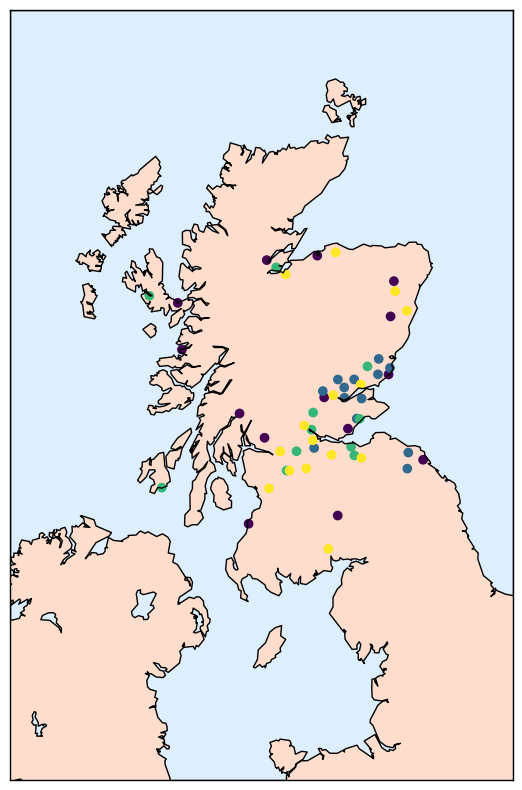

In [ ]:
plt.figure(figsize=(10, 10))
a = 2
m = Basemap(projection='gnom', lat_0=57, lon_0=-6.2,
                width=3E6, height=2E6, resolution='i',
                 llcrnrlon=df['longitude'].min()-a, llcrnrlat=df['latitude'].min()-a, urcrnrlon=df['longitude'].max()+a, urcrnrlat=df['latitude'].max()+a)
m.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF')
m.drawmapboundary(fill_color="#DDEEFF")
m.drawcoastlines()
# m.shadedrelief(scale=0.9)
scatter = m.scatter(df['longitude'], df['latitude'], latlon=True,c=pd.read_csv('SupplierProductGroup.csv')['SupplierProductGroup'])



# plt.scatter(x = df['longitude'],y = df['latitude'])
plt.show()

<Axes: >

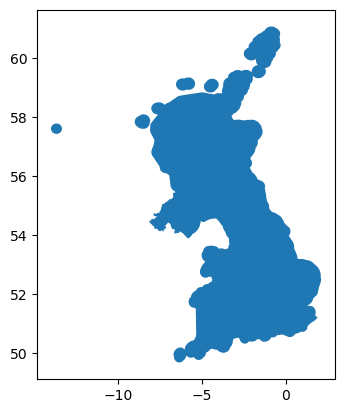

In [ ]:
place_name = "United Kingdom"
import osmnx as ox
import geopandas as gpd

# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)
area
area.plot()